In [36]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

# Suppress All Warnings In Python
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [37]:
# Carregando datasets e digitos
digits = load_digits()
X, Y = digits.data, digits.target

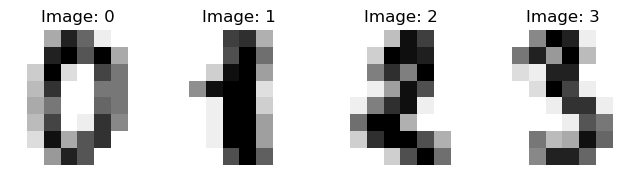

In [38]:
# Visualizando imagem e target
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 8))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Image: %i" % label)

In [39]:
# Dividindo dataset em jogo de treino e jogo de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
# Criando um modelo knn
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [41]:
# Valor de precisão
score = knn.score(X_test, Y_test)
print('Score: %f' % score)

Score: 0.997222


In [42]:
# Testando k de 1 a 20
neighbors = np.arange(1, 21)
train_accurancy = np.empty(len(neighbors))
test_accurancy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accurancy[i] = knn.score(X_train, Y_train)
    test_accurancy[i] = knn.score(X_test, Y_test)

In [43]:
print(test_accurancy)

[1.         0.99722222 1.         0.99722222 0.99722222 0.99722222
 0.99444444 0.99444444 0.99166667 0.99444444 0.99444444 0.99444444
 0.98888889 0.98611111 0.98611111 0.98333333 0.98333333 0.98333333
 0.98055556 0.97777778]


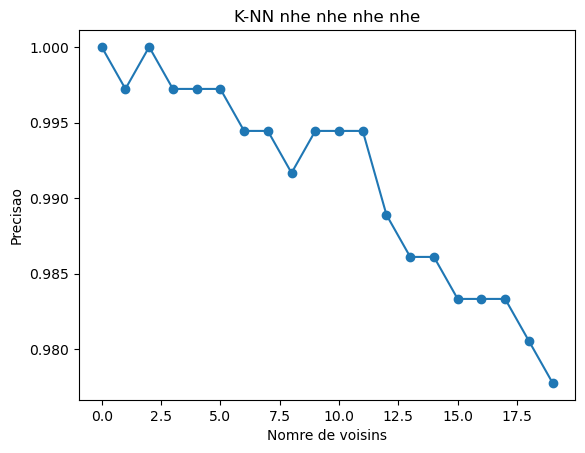

In [44]:
# Visualizando valor de precisão de teste
plt.plot(test_accurancy, 'o-')
plt.title('K-NN nhe nhe nhe nhe')
plt.xlabel('Nomre de voisins')
plt.ylabel('Precisao')
plt.show()

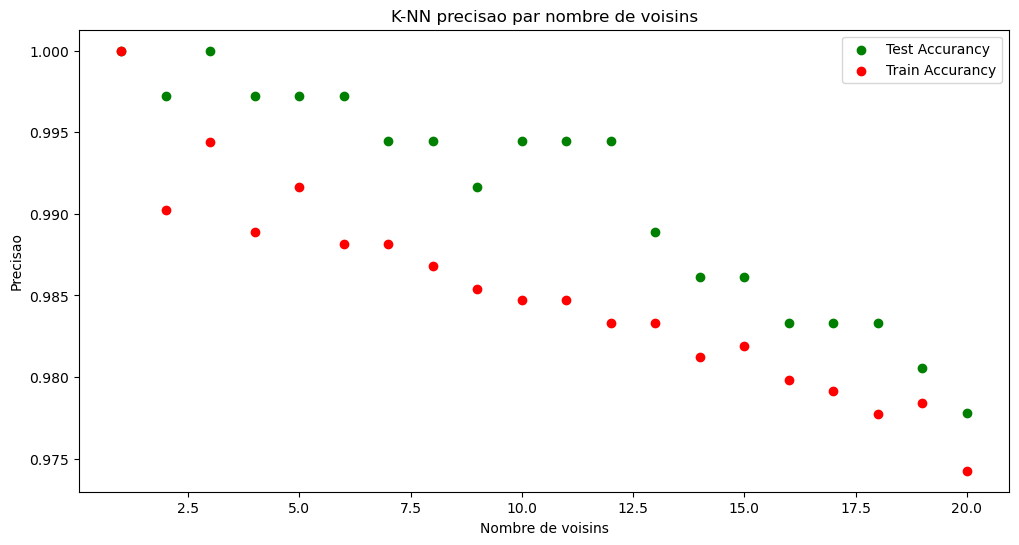

In [45]:
# Visualizando valores de treinamento de teste 
plt.figure(figsize=(12,6))
plt.title('K-NN precisao par nombre de voisins')
plt.scatter(neighbors, test_accurancy, label='Test Accurancy', color="green")
plt.scatter(neighbors, train_accurancy, label="Train Accurancy", color="red")
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Precisao')
plt.show()

In [46]:
y_pred=knn.predict(X_test)

In [34]:
# Matriz de confusão
cm = confusion_matrix(Y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  3,  0,  2,  0,  0,  0,  1, 37,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 30]], dtype=int64)

In [35]:
np.bincount(Y_test)

array([43, 42, 40, 34, 37, 28, 28, 33, 43, 32], dtype=int64)